#### Hierarchical clustering

In [27]:
import sklearn
# Check version
print(sklearn.__version__)

1.4.0


In [28]:
#Importing th necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [29]:
# importing the dataset
df=pd.read_csv('crime_data.csv')

In [30]:
#EDA
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [31]:
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [33]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [34]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [35]:
df.duplicated().sum()

0

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


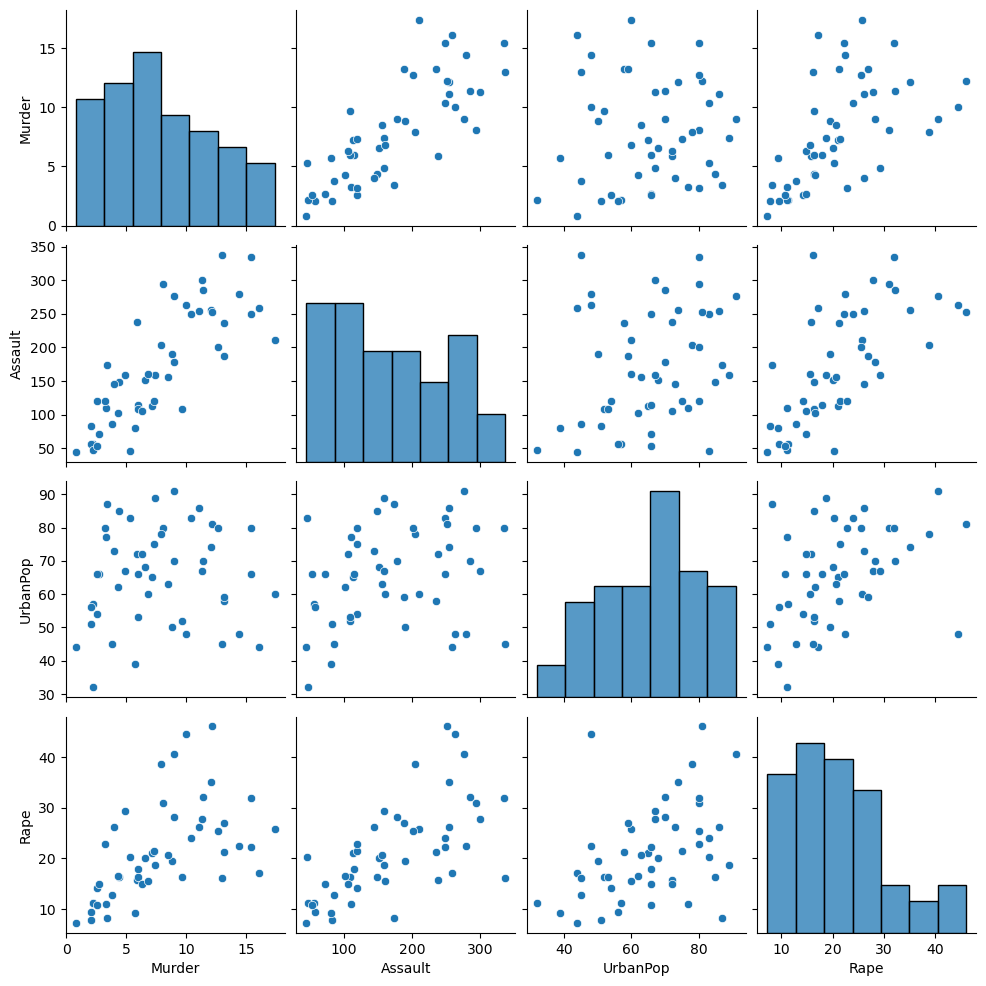

In [36]:
# Visualizing the data
sns.pairplot(df.iloc[:,1:])
plt.show()


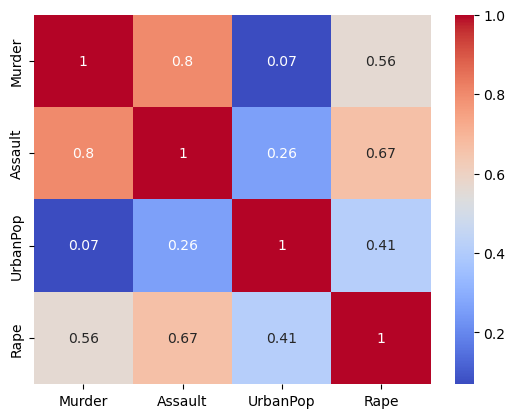

In [37]:
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm')
plt.show()


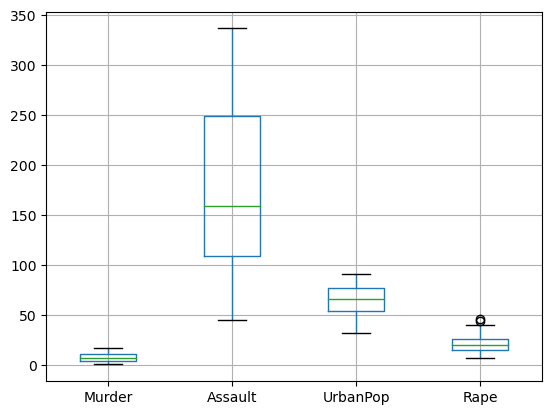

In [38]:
df.iloc[:,1:].boxplot()
plt.show()


In [39]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [40]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

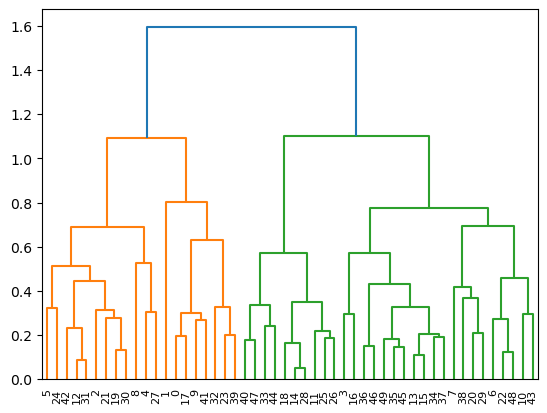

In [41]:
# creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
# this is giving the better results so we should go with this one

In [44]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, linkage='complete')
hc.fit_predict(df_norm)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
hc.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [47]:
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
df_norm['h_clusterid'] = hc.labels_


In [49]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,1


In [50]:
df_norm['h_clusterid'] = hc.labels_

# Check the mean for each cluster
df_norm.groupby(['h_clusterid']).mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,0.245181,0.237785,0.536158,0.223342
1,0.684639,0.720034,0.616949,0.564987


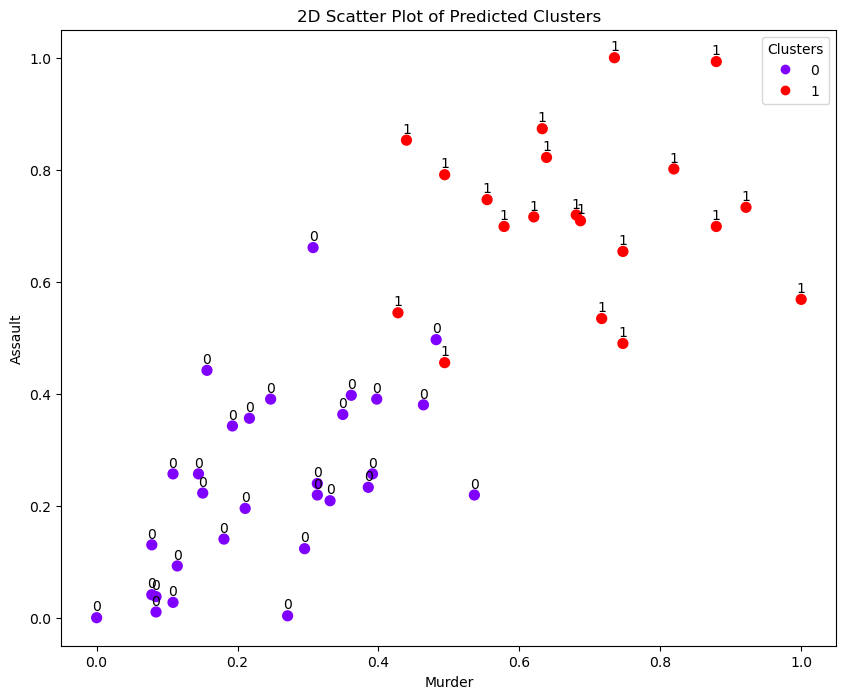

In [51]:
# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_norm['Murder'], df_norm['Assault'], c=df_norm['h_clusterid'], cmap='rainbow', s=50)

# Set labels
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('2D Scatter Plot of Predicted Clusters')

# Add cluster labels as annotations
for i, label in enumerate(df_norm['h_clusterid']):
    plt.annotate(str(label), (df_norm['Murder'][i], df_norm['Assault'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Add a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

# Show the plot
plt.show()



In [52]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm.iloc[:, :-1], hc.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.42364457559625074
